In [1]:
import tensorflow as tf
import numpy as np

In [6]:
help(tf.reduce_sum)

Help on function reduce_sum in module tensorflow.python.ops.math_ops:

reduce_sum(input_tensor, axis=None, keep_dims=False, name=None, reduction_indices=None)
    Computes the sum of elements across dimensions of a tensor.
    
    Reduces `input_tensor` along the dimensions given in `axis`.
    Unless `keep_dims` is true, the rank of the tensor is reduced by 1 for each
    entry in `axis`. If `keep_dims` is true, the reduced dimensions
    are retained with length 1.
    
    If `axis` has no entries, all dimensions are reduced, and a
    tensor with a single element is returned.
    
    For example:
    
    ```python
    # 'x' is [[1, 1, 1]
    #         [1, 1, 1]]
    tf.reduce_sum(x) ==> 6
    tf.reduce_sum(x, 0) ==> [2, 2, 2]
    tf.reduce_sum(x, 1) ==> [3, 3]
    tf.reduce_sum(x, 1, keep_dims=True) ==> [[3], [3]]
    tf.reduce_sum(x, [0, 1]) ==> 6
    ```
    
    Args:
      input_tensor: The tensor to reduce. Should have numeric type.
      axis: The dimensions to reduce. If 

## Basic Understanding , how to write functions and other stuffs



In [8]:
# initialize variables/model parameters
W = tf.Variable(tf.zeros([2, 1]), name="weights")
b = tf.Variable(0., name="bias")

In [10]:
def inference(X):
    return tf.matmul(X, W) + b
# matmul : matrix multiply

In [12]:
def loss(X, Y):
    Y_predicted = inference(X)
    return tf.reduce_sum(tf.squared_difference(Y, Y_predicted))

In [14]:
def train(total_loss):
    learning_rate = 0.0000001
    return tf.train.GradientDescentOptimizer(learning_rate).minimize(total_loss)

In [16]:
def evaluate(sess, X, Y):
    print (sess.run(inference([[80., 25.]]))) # ~ 303
    print (sess.run(inference([[65., 25.]]))) # ~ 256

## Linear Regression on Iris Dataset
* Iris dataset contains 4 features of each flower
* linear Regression -> y = ax +b 
* we know y and x, we will be calculating best values of a and b to get a straight line 

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets
from tensorflow.python.framework import ops

In [3]:
#Reset graph, useful
ops.reset_default_graph()

# Create graph
sess = tf.Session()

In [4]:
iris = datasets.load_iris()

In [5]:
iris.data
#four features of each flower in an row

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 4

In [6]:
iris.target
#three different flowers 0, 1, 2  

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
x_vals = np.array([x[3] for x in iris.data])
# last feature from an feature array

In [8]:
x_vals

array([ 0.2,  0.2,  0.2,  0.2,  0.2,  0.4,  0.3,  0.2,  0.2,  0.1,  0.2,
        0.2,  0.1,  0.1,  0.2,  0.4,  0.4,  0.3,  0.3,  0.3,  0.2,  0.4,
        0.2,  0.5,  0.2,  0.2,  0.4,  0.2,  0.2,  0.2,  0.2,  0.4,  0.1,
        0.2,  0.1,  0.2,  0.2,  0.1,  0.2,  0.2,  0.3,  0.3,  0.2,  0.6,
        0.4,  0.3,  0.2,  0.2,  0.2,  0.2,  1.4,  1.5,  1.5,  1.3,  1.5,
        1.3,  1.6,  1. ,  1.3,  1.4,  1. ,  1.5,  1. ,  1.4,  1.3,  1.4,
        1.5,  1. ,  1.5,  1.1,  1.8,  1.3,  1.5,  1.2,  1.3,  1.4,  1.4,
        1.7,  1.5,  1. ,  1.1,  1. ,  1.2,  1.6,  1.5,  1.6,  1.5,  1.3,
        1.3,  1.3,  1.2,  1.4,  1.2,  1. ,  1.3,  1.2,  1.3,  1.3,  1.1,
        1.3,  2.5,  1.9,  2.1,  1.8,  2.2,  2.1,  1.7,  1.8,  1.8,  2.5,
        2. ,  1.9,  2.1,  2. ,  2.4,  2.3,  1.8,  2.2,  2.3,  1.5,  2.3,
        2. ,  2. ,  1.8,  2.1,  1.8,  1.8,  1.8,  2.1,  1.6,  1.9,  2. ,
        2.2,  1.5,  1.4,  2.3,  2.4,  1.8,  1.8,  2.1,  2.4,  2.3,  1.9,
        2.3,  2.5,  2.3,  1.9,  2. ,  2.3,  1.8])

In [9]:
y_vals = np.array([y[0] for y in iris.data])
#  first feature from feature matrix

In [10]:
y_vals

array([ 5.1,  4.9,  4.7,  4.6,  5. ,  5.4,  4.6,  5. ,  4.4,  4.9,  5.4,
        4.8,  4.8,  4.3,  5.8,  5.7,  5.4,  5.1,  5.7,  5.1,  5.4,  5.1,
        4.6,  5.1,  4.8,  5. ,  5. ,  5.2,  5.2,  4.7,  4.8,  5.4,  5.2,
        5.5,  4.9,  5. ,  5.5,  4.9,  4.4,  5.1,  5. ,  4.5,  4.4,  5. ,
        5.1,  4.8,  5.1,  4.6,  5.3,  5. ,  7. ,  6.4,  6.9,  5.5,  6.5,
        5.7,  6.3,  4.9,  6.6,  5.2,  5. ,  5.9,  6. ,  6.1,  5.6,  6.7,
        5.6,  5.8,  6.2,  5.6,  5.9,  6.1,  6.3,  6.1,  6.4,  6.6,  6.8,
        6.7,  6. ,  5.7,  5.5,  5.5,  5.8,  6. ,  5.4,  6. ,  6.7,  6.3,
        5.6,  5.5,  5.5,  6.1,  5.8,  5. ,  5.6,  5.7,  5.7,  6.2,  5.1,
        5.7,  6.3,  5.8,  7.1,  6.3,  6.5,  7.6,  4.9,  7.3,  6.7,  7.2,
        6.5,  6.4,  6.8,  5.7,  5.8,  6.4,  6.5,  7.7,  7.7,  6. ,  6.9,
        5.6,  7.7,  6.3,  6.7,  7.2,  6.2,  6.1,  6.4,  7.2,  7.4,  7.9,
        6.4,  6.3,  6.1,  7.7,  6.3,  6.4,  6. ,  6.9,  6.7,  6.9,  5.8,
        6.8,  6.7,  6.7,  6.3,  6.5,  6.2,  5.9])

In [11]:
batch_size = 25


In [12]:
# Initialize placeholders
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

#shape(rows,cols)

In [13]:
# Create variables for linear regression, some default values
A = tf.Variable(tf.random_normal(shape=[1,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))


In [14]:
model_output = tf.add(tf.matmul(x_data, A), b)
# similar to a.x+b

In [15]:
# Declare loss function (L2 loss)
loss = tf.reduce_mean(tf.square(y_target - model_output))

In [16]:
# Initialize variables
init = tf.global_variables_initializer()
sess.run(init)

In [17]:
#we have calculated loss function till now, lets go for its mizimization by using Optmizers, we will opt GradientDescentOptimizer
#0.05 learning rate
my_opt = tf.train.GradientDescentOptimizer(0.05)

In [18]:
train_step = my_opt.minimize(loss)

In [19]:

# Training loop
loss_vec = []
for i in range(100):
    rand_index = np.random.choice(len(x_vals), size=batch_size) 
    #it will take any random 25 numbers from len(x_vals) at each iteration, we do this to get our model trained with robust env
    
    rand_x = np.transpose([x_vals[rand_index]])
    rand_y = np.transpose([y_vals[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec.append(temp_loss)
    if (i+1)%25==0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)) + ' b = ' + str(sess.run(b)))
        print('Loss = ' + str(temp_loss))


Step #25 A = [[ 2.10541701]] b = [[ 2.95953369]]
Loss = 1.01246
Step #50 A = [[ 1.63303065]] b = [[ 3.69105172]]
Loss = 0.532487
Step #75 A = [[ 1.35449696]] b = [[ 4.12721109]]
Loss = 0.408444
Step #100 A = [[ 1.16831899]] b = [[ 4.36233377]]
Loss = 0.354728


In [20]:
len(x_vals)


150

In [21]:
rand_y

array([[ 6.1],
       [ 6.4],
       [ 4.6],
       [ 5.9],
       [ 5.8],
       [ 5.5],
       [ 5.5],
       [ 4.6],
       [ 7.7],
       [ 5. ],
       [ 7.3],
       [ 6.3],
       [ 6. ],
       [ 5.1],
       [ 7.7],
       [ 6.3],
       [ 5.9],
       [ 5.1],
       [ 6.2],
       [ 7.7],
       [ 4.4],
       [ 5.7],
       [ 5. ],
       [ 7.7],
       [ 6.9]])

In [22]:
#Get Optimal coefficients
[slope] = sess.run(A)
[y_intercept] = sess.run(b)

In [23]:
slope

array([ 1.16831899], dtype=float32)

In [24]:
y_intercept

array([ 4.36233377], dtype=float32)

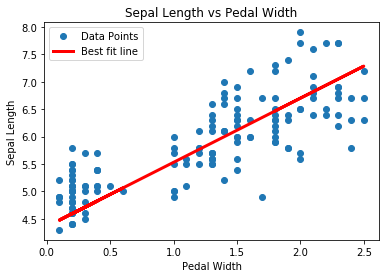

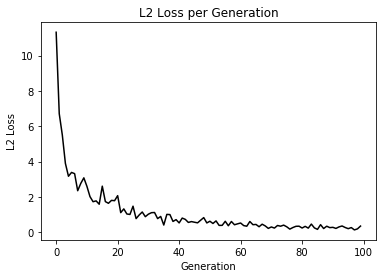

In [25]:
# Get best fit line
best_fit = []
for i in x_vals:
  best_fit.append(slope*i+y_intercept)

# Plot the result
plt.plot(x_vals, y_vals, 'o', label='Data Points')
plt.plot(x_vals, best_fit, 'r-', label='Best fit line', linewidth=3)
plt.legend(loc='upper left')
plt.title('Sepal Length vs Pedal Width')
plt.xlabel('Pedal Width')
plt.ylabel('Sepal Length')
plt.show()

# Plot loss over time
plt.plot(loss_vec, 'k-')
plt.title('L2 Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('L2 Loss')
plt.show()